# Forecast S&P 500 Index Closing Price

Goal....

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_absolute_error, mean_squared_error

## Ingest

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jhancuch/SP500-forecasting/main/data/daily_index.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,28-Feb-22,"4,354.17","4,388.84","4,315.12","4,373.94","4,373.94","4,594,010,000"
1,25-Feb-22,"4,298.38","4,385.34","4,286.83","4,384.65","4,384.65","3,941,780,000"
2,24-Feb-22,"4,155.77","4,294.73","4,114.65","4,288.70","4,288.70","5,070,560,000"
3,23-Feb-22,"4,324.93","4,341.51","4,221.51","4,225.50","4,225.50","3,814,340,000"
4,22-Feb-22,"4,332.74","4,362.12","4,267.11","4,304.76","4,304.76","4,007,780,000"


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,7-Mar-17,"2,370.74","2,375.12","2,365.51","2,368.39","2,368.39","3,518,390,000"
1255,6-Mar-17,"2,375.23","2,378.80","2,367.98","2,375.31","2,375.31","3,232,700,000"
1256,3-Mar-17,"2,380.92","2,383.89","2,375.39","2,383.12","2,383.12","3,555,260,000"
1257,2-Mar-17,"2,394.75","2,394.75","2,380.17","2,381.92","2,381.92","3,821,320,000"
1258,1-Mar-17,"2,380.13","2,400.98","2,380.13","2,395.96","2,395.96","4,345,180,000"


In [5]:
data.shape

(1259, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1259 non-null   object
 1   Open       1259 non-null   object
 2   High       1259 non-null   object
 3   Low        1259 non-null   object
 4   Close      1259 non-null   object
 5   Adj Close  1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Open'] = data['Open'].str.replace(',','').astype(float)
data['High'] = data['High'].str.replace(',','').astype(float)
data['Low'] = data['Low'].str.replace(',','').astype(float)
data['Close'] = data['Close'].str.replace(',','').astype(float)
data['Adj Close'] = data['Adj Close'].str.replace(',','').astype(float)
data['Volume'] = data['Volume'].str.replace(',','').astype(int)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,3188.838793,3205.339841,3170.685044,3189.184885,3189.184885,3.867971e+09
std,688.961141,692.549064,685.400607,689.307955,689.307955,1.067455e+09
min,2290.710000,2300.730000,2191.860000,2237.400000,2237.400000,1.296540e+09
25%,2691.105000,2708.745000,2677.385000,2692.190000,2692.190000,3.233955e+09
50%,2918.460000,2931.150000,2903.820000,2919.370000,2919.370000,3.589930e+09
75%,3634.840000,3643.310000,3608.960000,3632.530000,3632.530000,4.155015e+09
max,4804.510000,4818.620000,4780.040000,4796.560000,4796.560000,9.878040e+09


Initially used volume but the variance was all over the place so removed it and got much better results

In [38]:
data.drop(columns=['Volume'], axis=1, inplace=True)

## EDA

commentary

In [9]:
data.isnull().sum().sum()

0

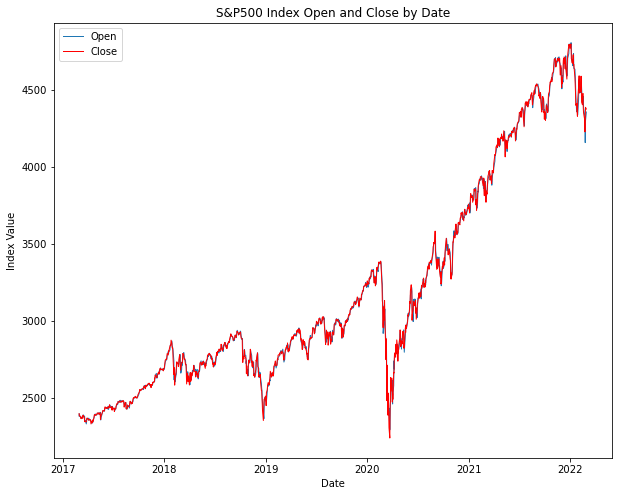

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(data.Date, data.Open, label='Open', linewidth=1)
plt.plot(data.Date, data.Close, color='red', label='Close', linewidth=1)

#add title and axis labels
plt.title('S&P500 Index Open and Close by Date')
plt.xlabel('Date')
plt.ylabel('Index Value')

#add legend
plt.legend()

#display plot
plt.show() 

No dif between close and adj close

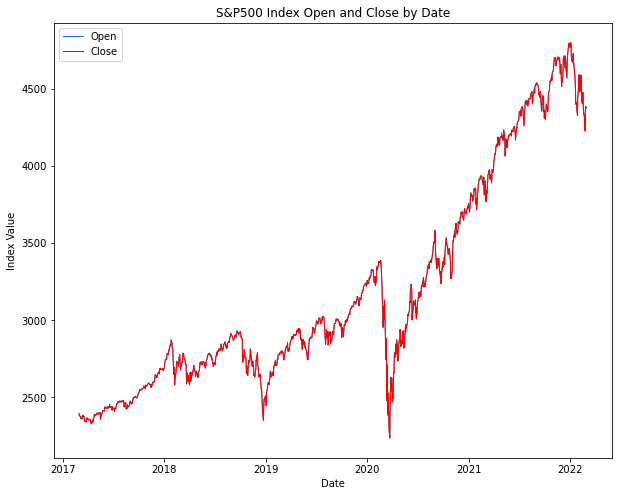

In [11]:
plt.figure(figsize=(10, 8))

plt.plot(data.Date, data['Adj Close'], label='Open', linewidth=1)
plt.plot(data.Date, data.Close, color='red', label='Close', linewidth=1)

#add title and axis labels
plt.title('S&P500 Index Open and Close by Date')
plt.xlabel('Date')
plt.ylabel('Index Value')

#add legend
plt.legend()

#display plot
plt.show() 

In [12]:
(data['Close'] - data['Adj Close'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1254    0.0
1255    0.0
1256    0.0
1257    0.0
1258    0.0
Length: 1259, dtype: float64

In [13]:
(data['Close'] - data['Adj Close']).mean()

0.0

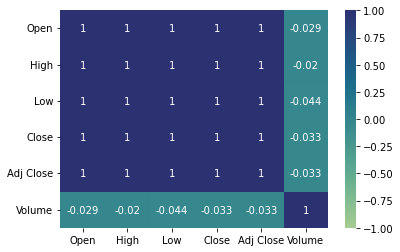

In [14]:
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot=True, cmap = 'crest')
plt.show()

## Modeling

### Preprocessing

blah blah blah

In [15]:
len(data)

1259

In [16]:
len(data)*.8

1007.2

In [39]:
data.iloc[:, 1:].max().max()

4818.62

In [40]:
X_train, y_train, X_test, y_test = data.iloc[:1008, 1:4]/4818.62, data.iloc[:1008, 4]/4818.62, data.iloc[1008:, 1:4]/4818.62, data.iloc[1008:, 4]/4818.62

In [41]:
X_train, X_test = np.array(X_train), np.array(X_test)

X_train_array = np.asarray(X_train.reshape((X_train.shape[0], 1, X_train.shape[1])))
X_test_array = np.asarray(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]))
y_train_array = np.asarray(y_train) 
y_test_array = np.asarray(y_test)

### Model 1

blah blah blah

In [137]:
model_1 = keras.models.Sequential([
    keras.layers.SimpleRNN(100, return_sequences=True, input_shape=(1, X_train_array.shape[2])),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(len(y_test_array)))
])

In [138]:
callback = tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=4)

In [139]:
model_1.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [140]:
history_model_1 = model_1.fit(X_train_array, y_train_array, epochs=100, 
                              validation_data=(X_test_array, y_test_array), 
                              callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 4s 37ms/step - loss: 0.3409 - root_mean_squared_error: 0.5767 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0931
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0632 - root_mean_squared_error: 0.2512 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0380
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.0444 - root_mean_squared_error: 0.2105 - val_loss: 0.0473 - val_root_mean_squared_error: 0.2171
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0377 - root_mean_squared_error: 0.1940 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1599
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.0330 - root_mean_squared_error: 0.1815 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1534
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 0.0320 - root_mean_squared_error: 0.1788 - val_loss: 0.0207 - val_

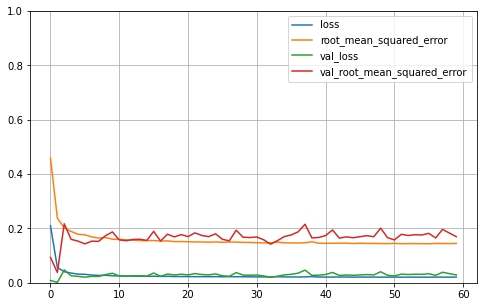

In [141]:
pd.DataFrame(history_model_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [142]:
model_1_forecast = model_1.predict(X_test_array)[-1:].reshape(-1,)

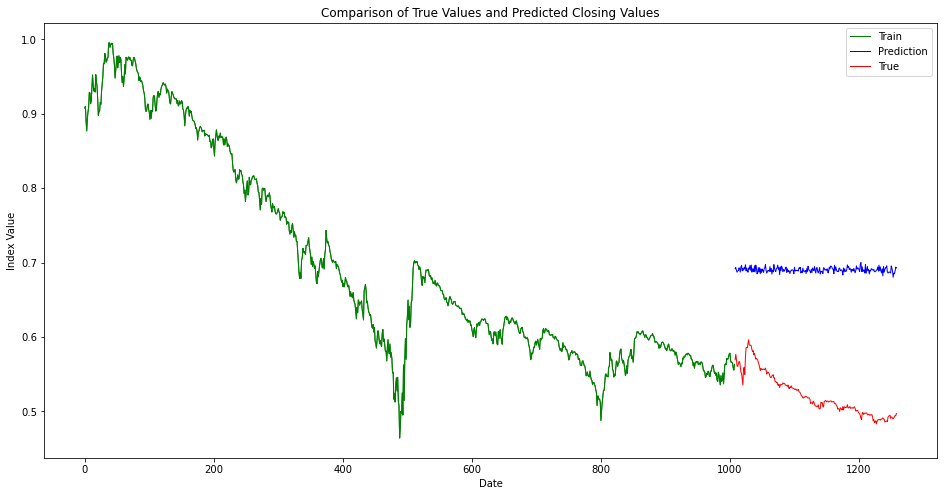

In [143]:
plt.figure(figsize=(16, 8))

train_x_axis = range(0, len(X_train_array))
pred_x_axis = range(max(train_x_axis) + 1, len(model_1_forecast) + max(train_x_axis) + 1)
                 
plt.plot(train_x_axis, y_train_array, color = 'green', linewidth=1)
plt.plot(train_x_axis, y_train_array, color='green', label='Train', linewidth=1)
plt.plot(pred_x_axis, model_1_forecast, color = 'blue', label='Prediction', linewidth=1)
plt.plot(pred_x_axis, y_test_array, color='red', label='True', linewidth=1)

#add title and axis labels
plt.title('Comparison of True Values and Predicted Closing Values')
plt.xlabel('Date')
plt.ylabel('Index Value')

#add legend
plt.legend()

#display plot
plt.show() 

In [144]:
np.sqrt(mean_squared_error(y_test_array, model_1_forecast))

0.1698926306808884

### Model 2

In [155]:
model_2 = keras.models.Sequential([
    keras.layers.GRU(50, return_sequences=True, input_shape=(1, X_train_array.shape[2])),
    keras.layers.GRU(50, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(50, return_sequences=True),
    keras.layers.GRU(50, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(50, return_sequences=True),
    keras.layers.GRU(50, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(len(y_test_array)))
])

In [156]:
callback = tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=1)

In [157]:
model_2.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [158]:
history_model_2 = model_2.fit(X_train_array, y_train_array, epochs=100, 
                              validation_data=(X_test_array, y_test_array),
                              callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 15s 110ms/step - loss: 0.4609 - root_mean_squared_error: 0.6785 - val_loss: 0.0422 - val_root_mean_squared_error: 0.2054
Epoch 2/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0570 - root_mean_squared_error: 0.2374 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1876
Epoch 3/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0216 - root_mean_squared_error: 0.1469 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1414
Epoch 4/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0211 - root_mean_squared_error: 0.1454 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1400
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0210 - root_mean_squared_error: 0.1446 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1433
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0216 - root_mean_squared_error: 0.1469 - val_loss: 0.0258 - va

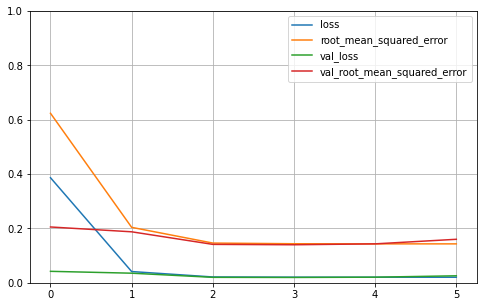

In [159]:
pd.DataFrame(history_model_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [160]:
model_2_forecast = model_2.predict(X_test_array)[-1:].reshape(-1,)

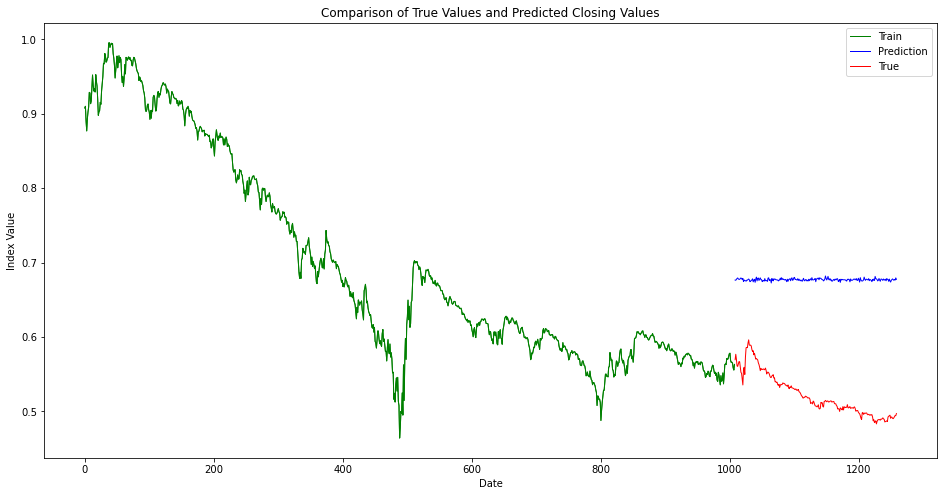

In [161]:
plt.figure(figsize=(16, 8))

train_x_axis = range(0, len(X_train_array))
pred_x_axis = range(max(train_x_axis) + 1, len(model_1_forecast) + max(train_x_axis) + 1)
                 
plt.plot(train_x_axis, y_train_array, color = 'green', linewidth=1)
plt.plot(train_x_axis, y_train_array, color='green', label='Train', linewidth=1)
plt.plot(pred_x_axis, model_2_forecast, color = 'blue', label='Prediction', linewidth=1)
plt.plot(pred_x_axis, y_test_array, color='red', label='True', linewidth=1)

#add title and axis labels
plt.title('Comparison of True Values and Predicted Closing Values')
plt.xlabel('Date')
plt.ylabel('Index Value')

#add legend
plt.legend()

#display plot
plt.show() 

In [162]:
np.sqrt(mean_squared_error(y_test_array, model_2_forecast))

0.1568765149997474

### Model 3

In [183]:
model_3 = keras.models.Sequential()
model_3.add(keras.layers.InputLayer(input_shape=(1, X_train_array.shape[2])))
for rate in (1, 2, 4, 8) * 2:
    model_3.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
model_3.add(keras.layers.Conv1D(filters=len(y_test_array), kernel_size=1))

In [184]:
model_3.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [185]:
callback = tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=1)

In [186]:
history_model_3 = model_3.fit(X_train_array, y_train_array, epochs=100, 
                              validation_data=(X_test_array, y_test_array),
                              callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 7s 188ms/step - loss: 0.4862 - root_mean_squared_error: 0.6973 - val_loss: 0.2168 - val_root_mean_squared_error: 0.4662
Epoch 2/100
32/32 [==============================] - 5s 160ms/step - loss: 0.3546 - root_mean_squared_error: 0.5943 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2149
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0572 - root_mean_squared_error: 0.2379 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1491
Epoch 4/100
32/32 [==============================] - 5s 156ms/step - loss: 0.0215 - root_mean_squared_error: 0.1466 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1309
Epoch 5/100
32/32 [==============================] - 6s 173ms/step - loss: 0.0198 - root_mean_squared_error: 0.1408 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1316
Epoch 6/100
32/32 [==============================] - 6s 174ms/step - loss: 0.0197 - root_mean_squared_error: 0.1402 - val_loss: 0.0236 -

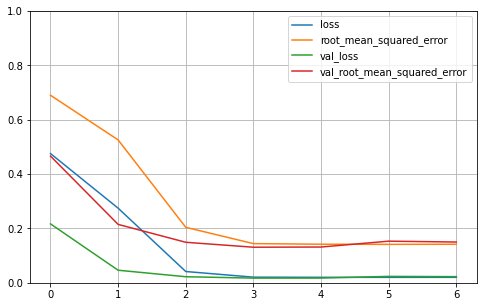

In [187]:
pd.DataFrame(history_model_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [194]:
model_3_forecast = model_3.predict(X_test_array)[-1:].reshape(-2,)

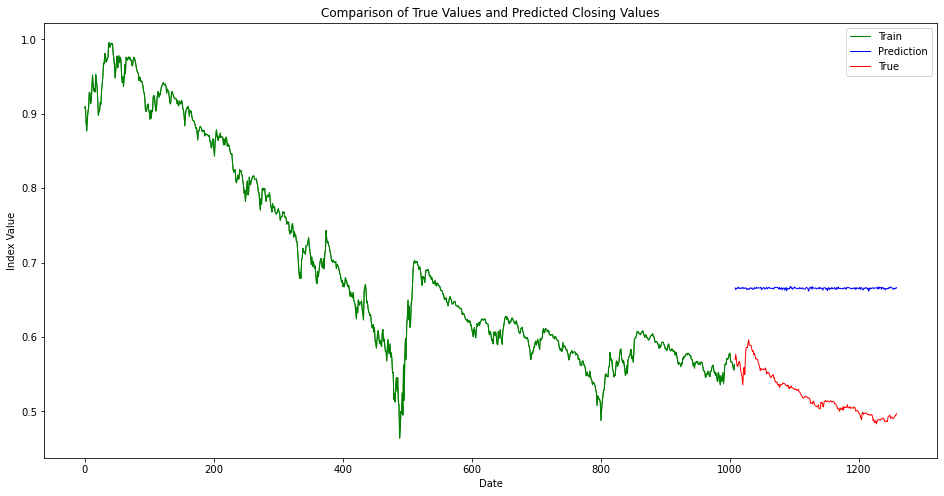

In [196]:
plt.figure(figsize=(16, 8))

train_x_axis = range(0, len(X_train_array))
pred_x_axis = range(max(train_x_axis) + 1, len(model_1_forecast) + max(train_x_axis) + 1)
                 
plt.plot(train_x_axis, y_train_array, color = 'green', linewidth=1)
plt.plot(train_x_axis, y_train_array, color='green', label='Train', linewidth=1)
plt.plot(pred_x_axis, model_3_forecast, color = 'blue', label='Prediction', linewidth=1)
plt.plot(pred_x_axis, y_test_array, color='red', label='True', linewidth=1)

#add title and axis labels
plt.title('Comparison of True Values and Predicted Closing Values')
plt.xlabel('Date')
plt.ylabel('Index Value')

#add legend
plt.legend()

#display plot
plt.show() 

In [197]:
np.sqrt(mean_squared_error(y_test_array, model_3_forecast))

0.14546896737901

## Conclusion